# Analyze the forward pass and backward pass of the back propagation algorithm for the network using your own initiate, forward, backward and loss functions . Only use NumPy , matplot libraries only.


Epoch 0: Loss = 4.108288933596785
Epoch 1000: Loss = 0.00805770115270495
Epoch 2000: Loss = 0.007968308756058954
Epoch 3000: Loss = 0.007957830542369449
Epoch 4000: Loss = 0.00794864920776115
Epoch 5000: Loss = 0.007948639069144468
Epoch 6000: Loss = 0.007948626723705504
Epoch 7000: Loss = 0.007948628573565594
Epoch 8000: Loss = 0.007948645811536759
Epoch 9000: Loss = 0.007948602064600694


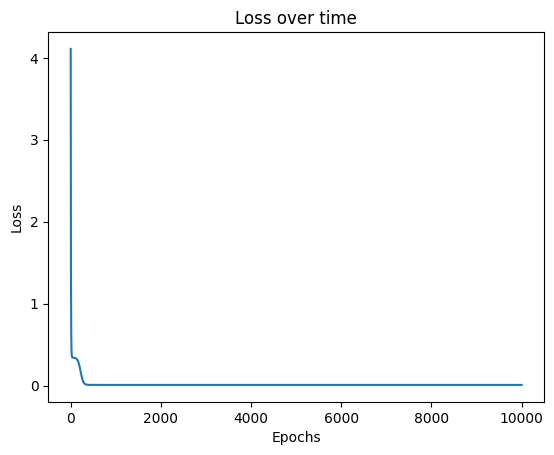

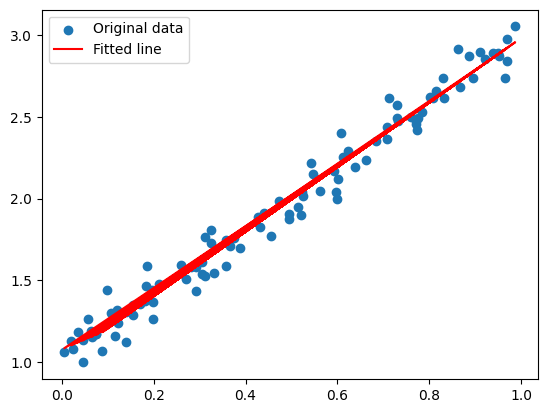

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# 1. Initialize weights and biases
def initialize_parameters(input_size, hidden_size, output_size):
    np.random.seed(42)
    W1 = np.random.randn(input_size, hidden_size) * 0.01
    b1 = np.zeros((1, hidden_size))
    W2 = np.random.randn(hidden_size, output_size) * 0.01
    b2 = np.zeros((1, output_size))
    return W1, b1, W2, b2
# 2. Forward pass function
def forward(X, W1, b1, W2, b2):
    Z1 = np.dot(X, W1) + b1  # Linear part
    A1 = np.maximum(0, Z1)   # ReLU activation
    Z2 = np.dot(A1, W2) + b2 # Linear part
    A2 = Z2                  # No activation at the output layer (for regression)
    return Z1, A1, Z2, A2
# 3. Loss function (Mean Squared Error)
def compute_loss(Y, A2):
    m = Y.shape[0]
    loss = (1/m) * np.sum((A2 - Y) ** 2)
    return loss
# 4. Backward pass function
def backward(X, Y, Z1, A1, Z2, A2, W1, W2):
    m = X.shape[0]

    dZ2 = A2 - Y                  # Gradient of loss w.r.t. Z2
    dW2 = (1/m) * np.dot(A1.T, dZ2) # Gradient of loss w.r.t. W2
    db2 = (1/m) * np.sum(dZ2, axis=0, keepdims=True) # Gradient of loss w.r.t. b2

    dA1 = np.dot(dZ2, W2.T)       # Gradient of loss w.r.t. A1
    dZ1 = dA1 * (Z1 > 0)          # Gradient of ReLU
    dW1 = (1/m) * np.dot(X.T, dZ1) # Gradient of loss w.r.t. W1
    db1 = (1/m) * np.sum(dZ1, axis=0, keepdims=True) # Gradient of loss w.r.t. b1

    return dW1, db1, dW2, db2
# 5. Training loop
def train(X, Y, input_size, hidden_size, output_size, learning_rate=0.01, epochs=10000):
    # Initialize parameters
    W1, b1, W2, b2 = initialize_parameters(input_size, hidden_size, output_size)
    loss_history = []

    for i in range(epochs):
        # Forward pass
        Z1, A1, Z2, A2 = forward(X, W1, b1, W2, b2)
        # Compute loss
        loss = compute_loss(Y, A2)
        loss_history.append(loss)
        # Backward pass
        dW1, db1, dW2, db2 = backward(X, Y, Z1, A1, Z2, A2, W1, W2)
        # Update parameters
        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2
        # Print the loss every 1000 epochs
        if i % 1000 == 0:
            print(f'Epoch {i}: Loss = {loss}')

    return W1, b1, W2, b2, loss_history
# 6. Visualization function
def plot_loss(loss_history):
    plt.plot(loss_history)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss over time')
    plt.show()
# Example usage
if __name__ == "__main__":
    # Create a simple dataset (e.g., y = 2x + 1)
    np.random.seed(42)
    X = np.random.rand(100, 1)
    Y = 2 * X + 1 + 0.1 * np.random.randn(100, 1)
    # Train the neural network
    W1, b1, W2, b2, loss_history = train(X, Y, input_size=1, hidden_size=10, output_size=1, learning_rate=0.1, epochs=10000)
    # Plot the loss
    plot_loss(loss_history)
    # Predicting and plotting results
    Z1, A1, Z2, A2 = forward(X, W1, b1, W2, b2)
    plt.scatter(X, Y, label='Original data')
    plt.plot(X, A2, color='red', label='Fitted line')
    plt.legend()
    plt.show()
